In [1]:
import base64
import datetime
import time
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates
np.random.seed(1337)
%matplotlib inline
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))
import os

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Read more about:
    
https://en.wikipedia.org/wiki/Prosper_Marketplace

### data dictionary:

https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [2]:
data_folder = '/Users/julcsi/gszjulcsi/Data/loan/'

In [3]:

# or in data_folder: Prosper Loan Data - Variable Definitions - Sheet1.tsv prosperLoanData.csv
loan_data_file=os.path.join(data_folder, 'prosperLoanData.csv')
loan_df = pd.read_csv(loan_data_file, index_col=0)

In [4]:
loan_df.head(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingKey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113937 entries, 1021339766868145413AB3B to E6ED3600409833199F711B7
Data columns (total 80 columns):
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha)                  84853 non-n

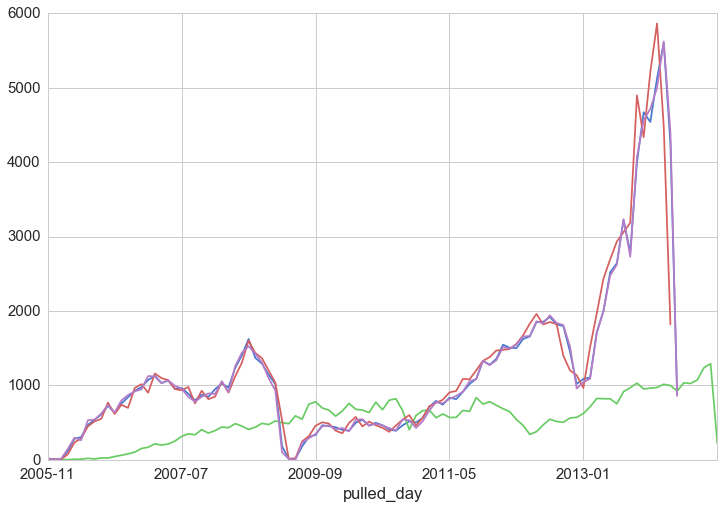

In [47]:
def date_to_day(d):
    try: 
        return d[0:7]
    except:
        return None
loan_df['listing_creation_day'] = loan_df['ListingCreationDate'].map(date_to_day)
loan_df['closed_day'] =loan_df['ClosedDate'].map(date_to_day )
loan_df['origination_day'] =loan_df['LoanOriginationDate'].map(date_to_day)
loan_df['pulled_day'] =loan_df['DateCreditPulled'].map(date_to_day)

loan_df.groupby('listing_creation_day')['ListingNumber'].count().plot()
loan_df.groupby('closed_day')['ListingNumber'].count().plot() # very different pattern than the others
loan_df.groupby('origination_day')['ListingNumber'].count().plot()
loan_df.groupby('pulled_day')['ListingNumber'].count().plot()

#loan_df.ClosedDate.value_counts().head()

In [7]:
loan_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [8]:
loan_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [ ]:
loan_df['EmploymentStatus'].value_counts()

In [9]:
loan_df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

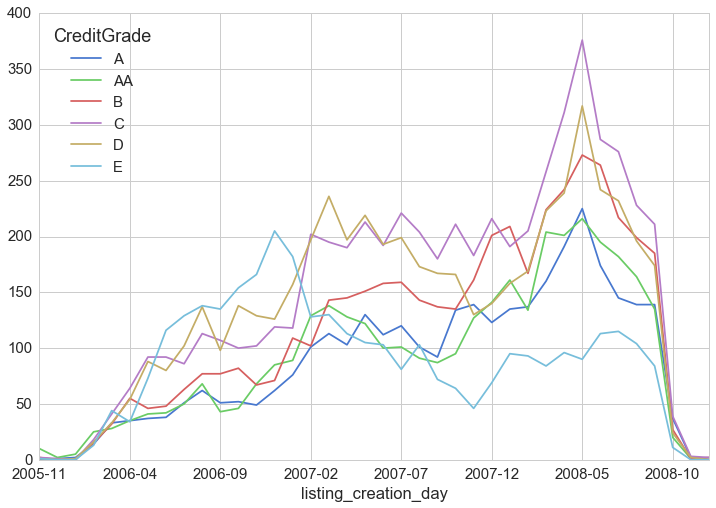

In [10]:

pd.crosstab(loan_df['listing_creation_day'], loan_df['CreditGrade'])[['A', 'AA', 'B', 'C', 'D', 'E']].plot()

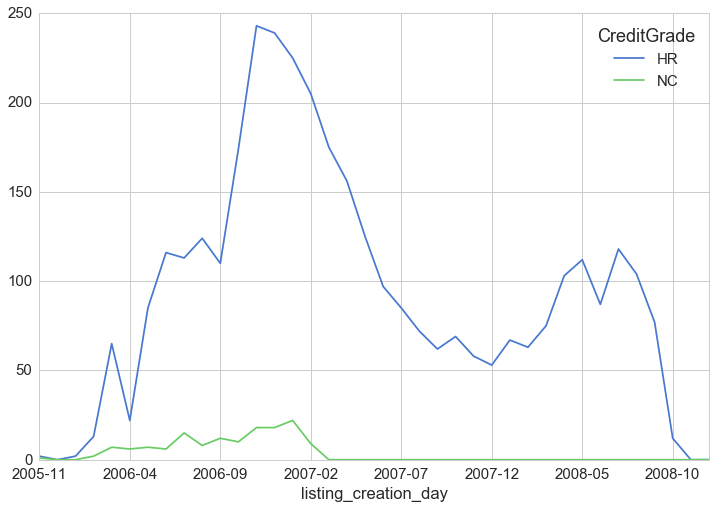

In [11]:
pd.crosstab(loan_df['listing_creation_day'], loan_df['CreditGrade'])[['HR', 'NC']].plot()

In [12]:
def unified_rating(row):
    if pd.isnull(row['CreditGrade']):
        return row['ProsperRating (Alpha)']
    else:
        return row['CreditGrade']
loan_df['unified_rating'] = loan_df.apply(unified_rating, 1)

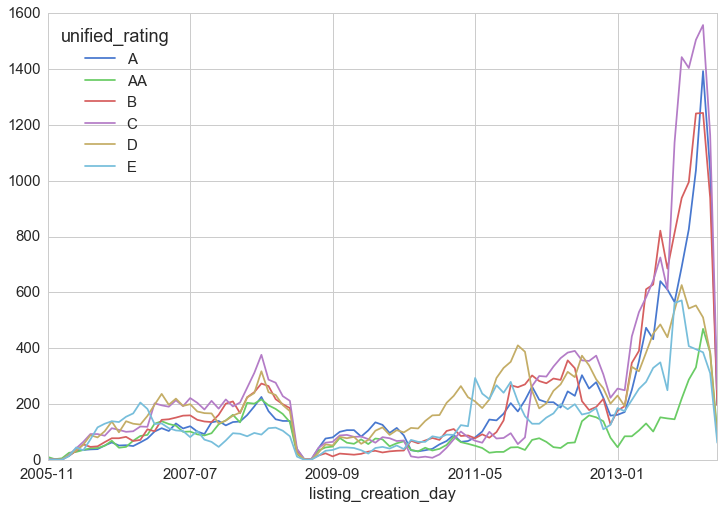

In [13]:
pd.crosstab(loan_df['listing_creation_day'], loan_df['unified_rating'])[['A', 'AA', 'B', 'C', 'D', 'E']].plot()

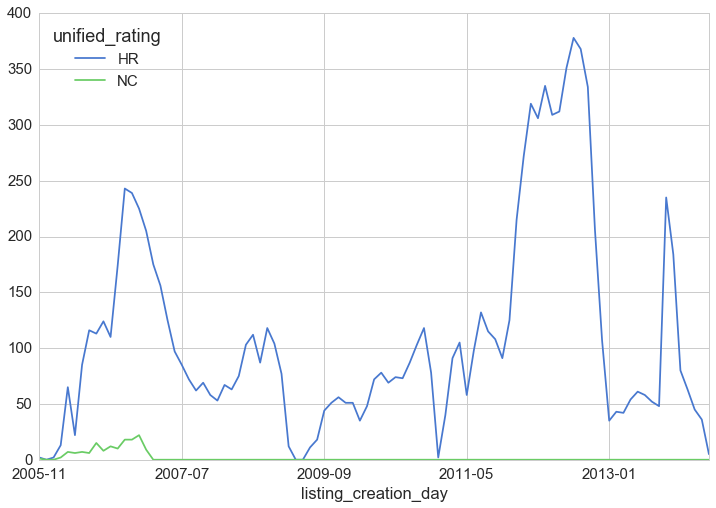

In [14]:
#HR = Lowest credit grade. No credit history or history of defaults.
pd.crosstab(loan_df['listing_creation_day'], loan_df['unified_rating'])[['HR', 'NC']].plot()

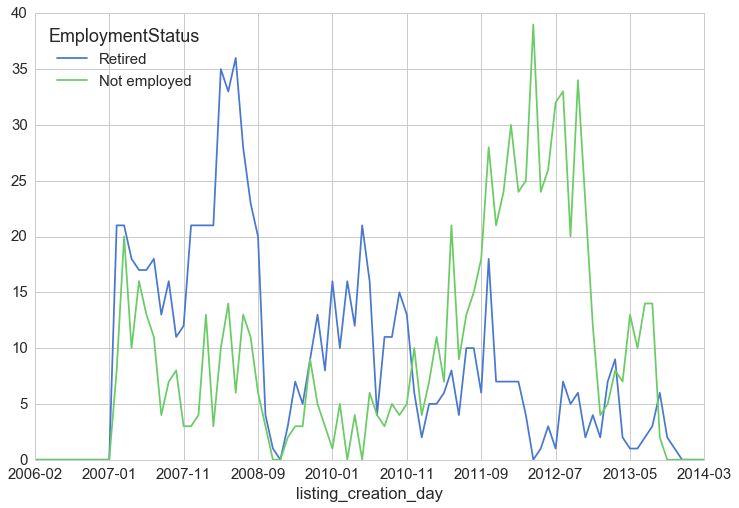

In [15]:
pd.crosstab(loan_df['listing_creation_day'],loan_df['EmploymentStatus'] )[['Retired', 'Not employed']].plot()

In [16]:
listing_category_dict = {
    0 : 'Not Available',
    1 : 'Debt Consolidation',
    2 : 'Home Improvement',
    3 : 'Business',
    4 : 'Personal Loan', 
    5 : 'Student Use', 
    6 : 'Auto', 
    7 : 'Other', 
    8 : 'Baby&Adoption', 
    9 : 'Boat', 
    10 : 'Cosmetic Procedure', 
    11 : 'Engagement Ring', 
    12 : 'Green Loans', 
    13 : 'Household Expenses', 
    14 : 'Large Purchases', 
    15 : 'Medical/Dental', 
    16 : 'Motorcycle', 
    17 : 'RV', 
    18 : 'Taxes', 
    19 : 'Vacation', 
    20 : 'Wedding Loans'
}
def decode_listing_category(code):
    return listing_category_dict[code]
loan_df['listing_category'] = loan_df['ListingCategory (numeric)'].map(decode_listing_category)

In [17]:
loan_df['listing_category'].value_counts().index

Index([u'Debt Consolidation', u'Not Available', u'Other', u'Home Improvement',
       u'Business', u'Auto', u'Personal Loan', u'Household Expenses',
       u'Medical/Dental', u'Taxes', u'Large Purchases', u'Wedding Loans',
       u'Vacation', u'Student Use', u'Motorcycle', u'Engagement Ring',
       u'Baby&Adoption', u'Cosmetic Procedure', u'Boat', u'Green Loans',
       u'RV'],
      dtype='object')

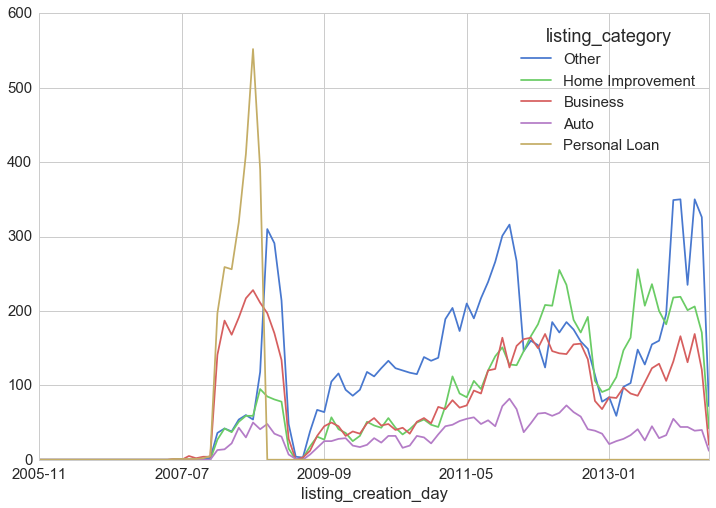

In [18]:
pd.crosstab(loan_df['listing_creation_day'],loan_df['listing_category'])[[ 
                                                                         'Other',
                                                                         'Home Improvement',
                                                                        'Business',
                                                                        'Auto',
                                                                        'Personal Loan']].plot()

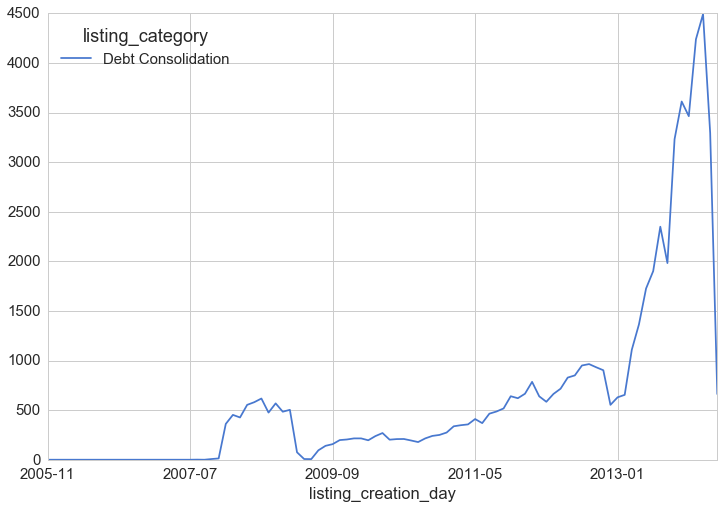

In [19]:
pd.crosstab(loan_df['listing_creation_day'],loan_df['listing_category'])[['Debt Consolidation']].plot()

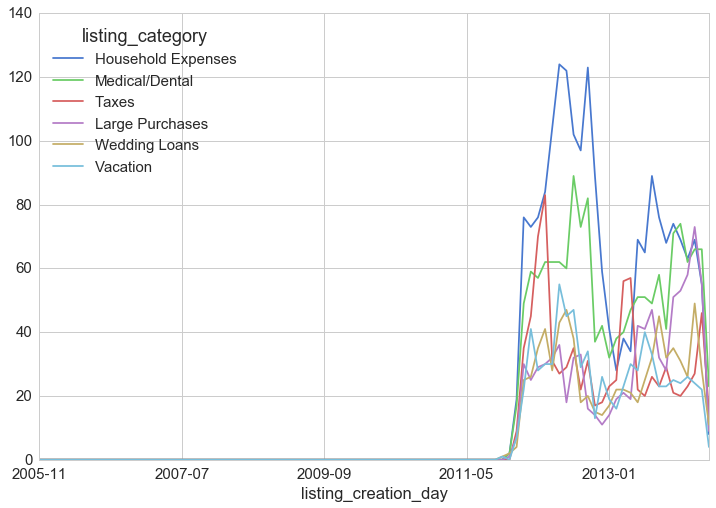

In [20]:
pd.crosstab(loan_df['listing_creation_day'],loan_df['listing_category'])[['Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
       'Vacation']].plot()

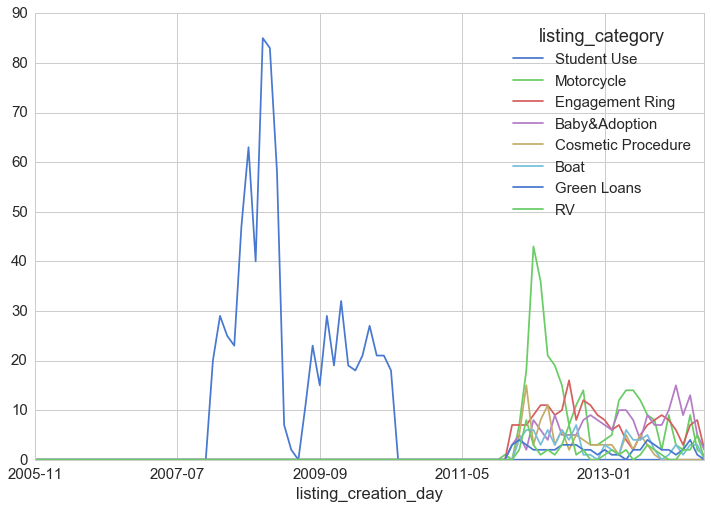

In [21]:
# http://www.wisegeek.com/what-are-green-loans.htm
pd.crosstab(loan_df['listing_creation_day'],loan_df['listing_category'])[['Student Use', 'Motorcycle','Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans',
       'RV']].plot()

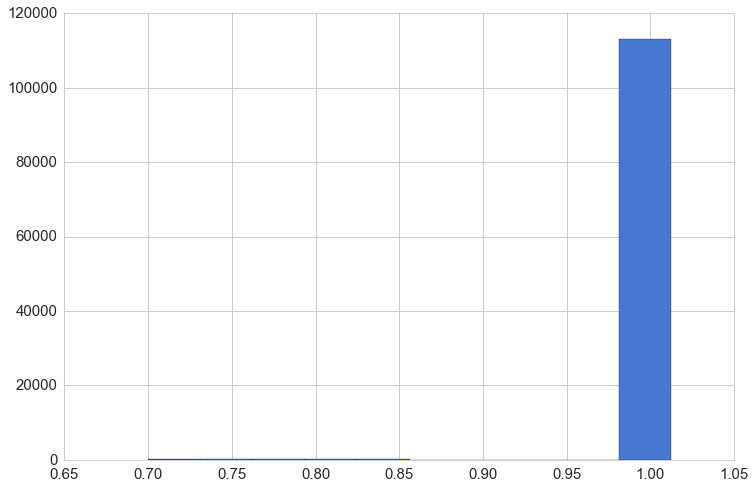

In [22]:
loan_df['PercentFunded'].hist()

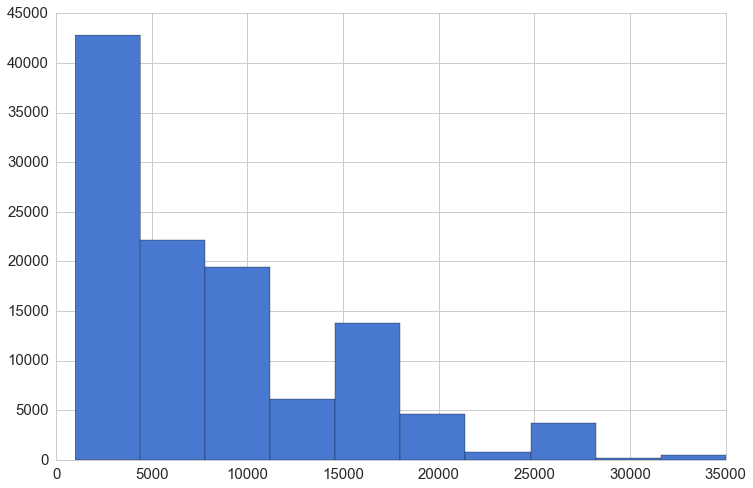

In [23]:
loan_df['LoanOriginalAmount'].hist()


In [24]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(loan_df, alpha=0.2, figsize=(30, 30), diagonal='kde')
# savefig('scatter_matrix.png')
loan_df.columns

Index([u'ListingNumber', u'ListingCreationDate', u'CreditGrade', u'Term',
       u'LoanStatus', u'ClosedDate', u'BorrowerAPR', u'BorrowerRate',
       u'LenderYield', u'EstimatedEffectiveYield', u'EstimatedLoss',
       u'EstimatedReturn', u'ProsperRating (numeric)',
       u'ProsperRating (Alpha)', u'ProsperScore', u'ListingCategory (numeric)',
       u'BorrowerState', u'Occupation', u'EmploymentStatus',
       u'EmploymentStatusDuration', u'IsBorrowerHomeowner',
       u'CurrentlyInGroup', u'GroupKey', u'DateCreditPulled',
       u'CreditScoreRangeLower', u'CreditScoreRangeUpper',
       u'FirstRecordedCreditLine', u'CurrentCreditLines', u'OpenCreditLines',
       u'TotalCreditLinespast7years', u'OpenRevolvingAccounts',
       u'OpenRevolvingMonthlyPayment', u'InquiriesLast6Months',
       u'TotalInquiries', u'CurrentDelinquencies', u'AmountDelinquent',
       u'DelinquenciesLast7Years', u'PublicRecordsLast10Years',
       u'PublicRecordsLast12Months', u'RevolvingCreditBalance',
    

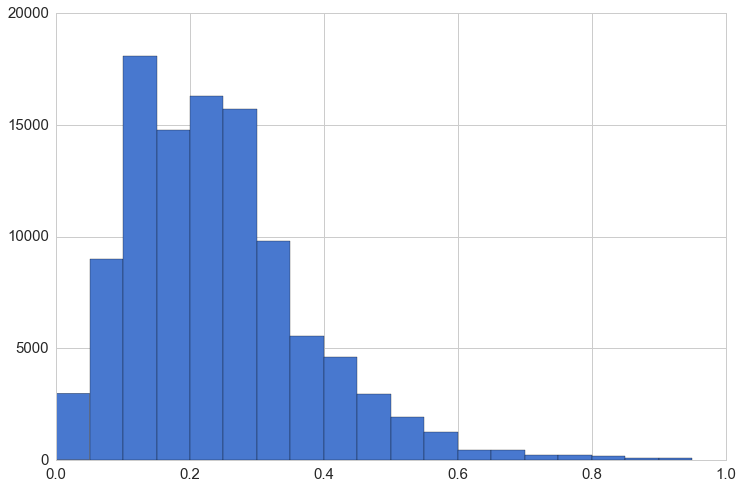

In [26]:
# maybe hoy this changes in time?
loan_df['DebtToIncomeRatio'].hist(bins=np.arange(0,1,0.05))

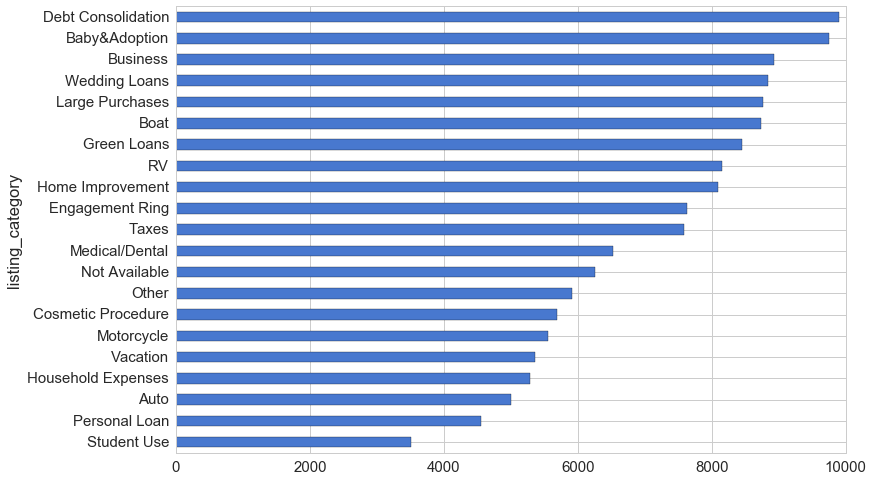

In [32]:
loan_df.groupby('listing_category')['LoanOriginalAmount'].mean().sort_values().plot(kind='barh')

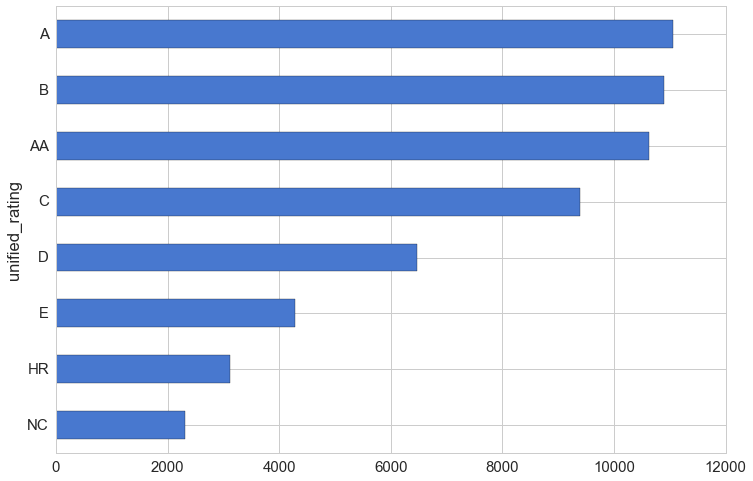

In [33]:
loan_df.groupby('unified_rating')['LoanOriginalAmount'].mean().sort_values().plot(kind='barh')

In [37]:
pd.crosstab(loan_df.listing_category, loan_df.unified_rating).apply(lambda r: 100 * r/r.sum(), axis=1)

unified_rating,A,AA,B,C,D,E,HR,NC
listing_category,,,,,,,,
Auto,15.750487,7.056530,14.463938,15.555556,21.832359,13.450292,11.890838,0.000000
Baby&Adoption,24.120603,7.537688,18.090452,20.603015,12.060302,10.552764,7.035176,0.000000
Boat,24.705882,5.882353,27.058824,17.647059,18.823529,3.529412,2.352941,0.000000
Business,16.299498,12.130508,16.759621,17.428890,17.205800,10.373675,9.802008,0.000000
Cosmetic Procedure,10.989011,1.098901,14.285714,25.274725,15.384615,15.384615,17.582418,0.000000
Debt Consolidation,17.770681,6.443803,20.286048,23.594657,15.610728,10.236599,6.057484,0.000000
Engagement Ring,16.129032,7.373272,15.668203,25.806452,15.207373,12.903226,6.912442,0.000000
Green Loans,20.338983,10.169492,8.474576,22.033898,15.254237,8.474576,15.254237,0.000000
Home Improvement,17.097817,9.417947,16.814875,18.660738,17.784964,10.617084,9.606575,0.000000


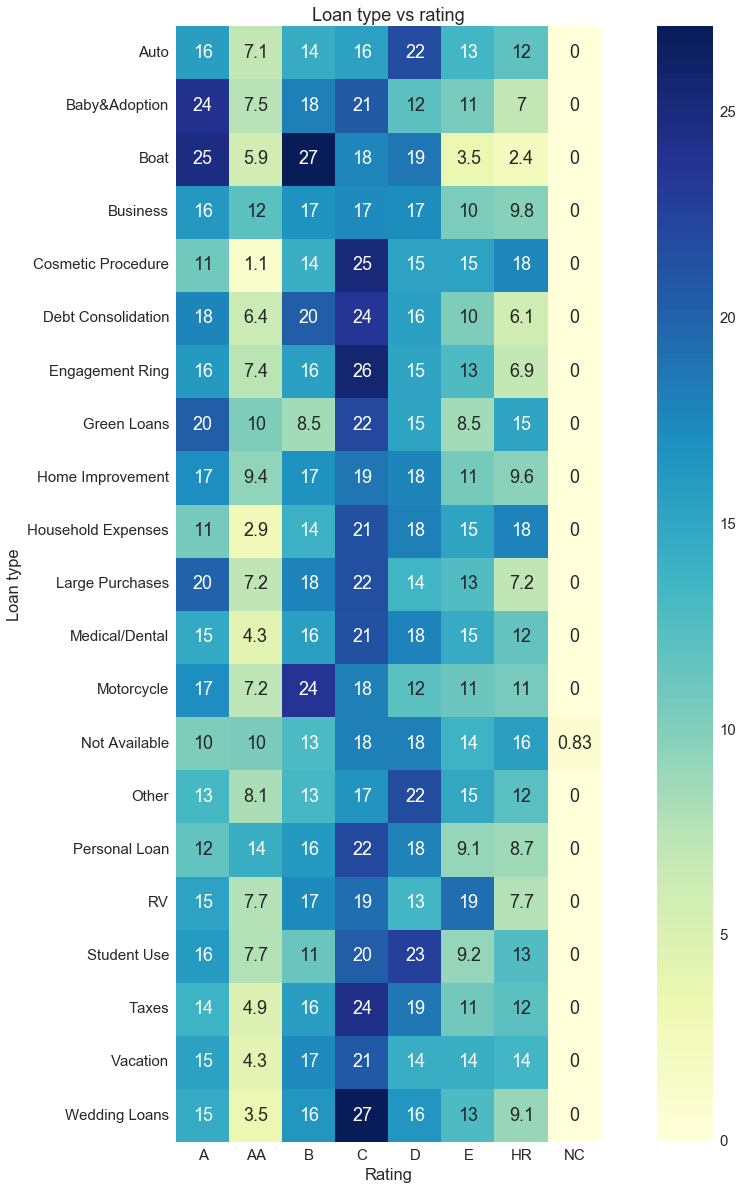

In [42]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(
        data=pd.crosstab(loan_df.listing_category, loan_df.unified_rating).apply(lambda r: 100 * r/r.sum(), axis=1),
        annot=True,
        #fmt='d',
        square=True,
        cmap='YlGnBu')
_ = ax.set_xlabel('Rating')
_ = ax.set_ylabel('Loan type')
_ = ax.set_title('Loan type vs rating')

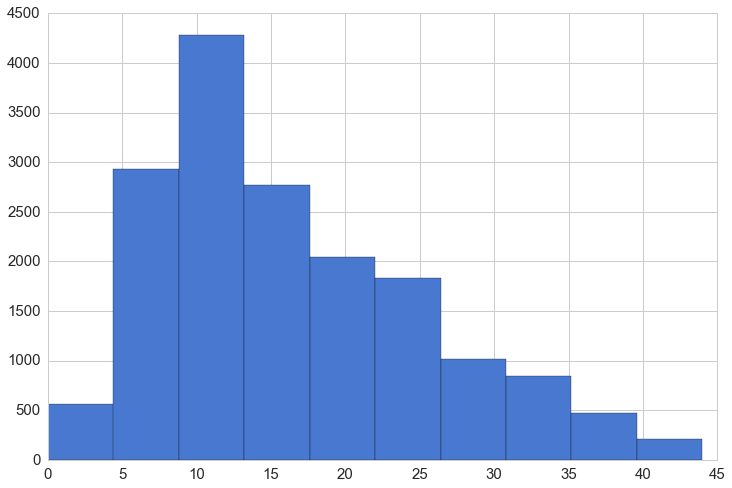

In [52]:
loan_df['LoanFirstDefaultedCycleNumber'][loan_df.LoanFirstDefaultedCycleNumber.notnull()].hist()

In [55]:
loan_df['InvestmentFromFriendsAmount'].value_counts().head()

0.0       111806
50.0         323
100.0        242
1000.0       100
500.0         97
Name: InvestmentFromFriendsAmount, dtype: int64

In [58]:
loan_df['PercentFunded'].value_counts().head()

1.0000    113067
0.9998         5
0.7000         4
0.8087         4
0.7092         3
Name: PercentFunded, dtype: int64

In [61]:
loan_df['InvestmentFromFriendsCount'].value_counts().head()

0    111806
1      1835
2       215
3        40
4        15
Name: InvestmentFromFriendsCount, dtype: int64

In [62]:
loan_df['Investors'].value_counts().head()

1    27814
2     1386
3      991
4      827
5      753
Name: Investors, dtype: int64

In [59]:
loan_df['Recommendations'].value_counts().head()

0    109678
1      3516
2       568
3       108
4        26
Name: Recommendations, dtype: int64

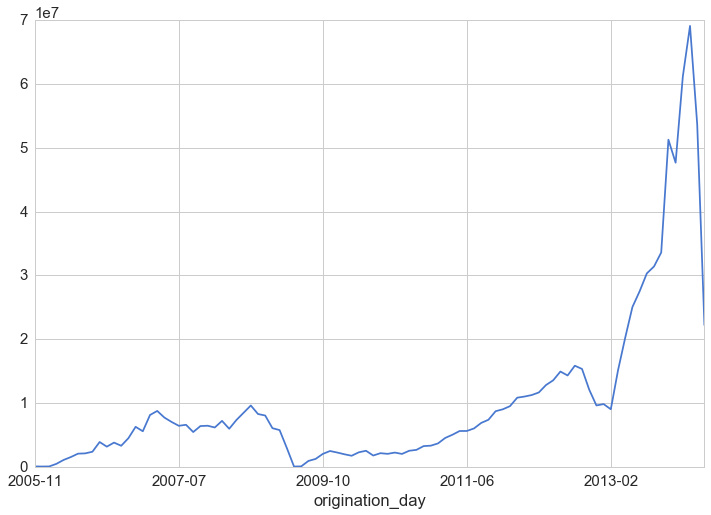

In [65]:
loan_df.groupby('origination_day')['LoanOriginalAmount'].sum().plot()

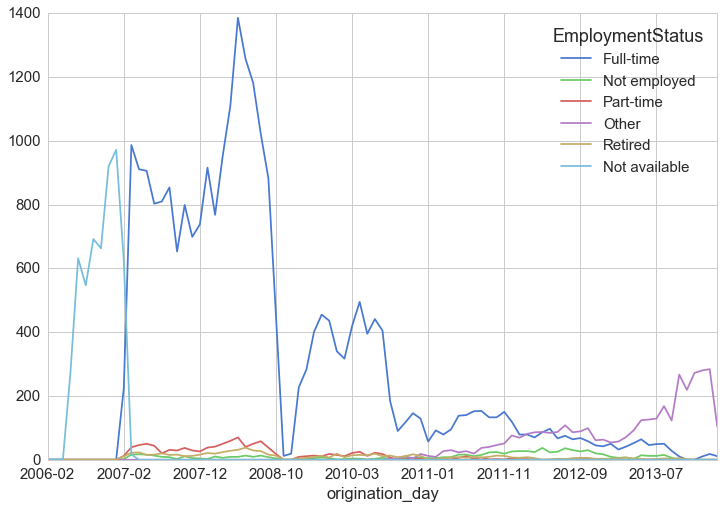

In [71]:
# loan_df.groupby('origination_day')['EmploymentStatus'].count()
pd.crosstab(loan_df['origination_day'], loan_df['EmploymentStatus'])[['Full-time', 'Not employed', 'Part-time', 'Other', 'Retired', 'Not available']].plot()

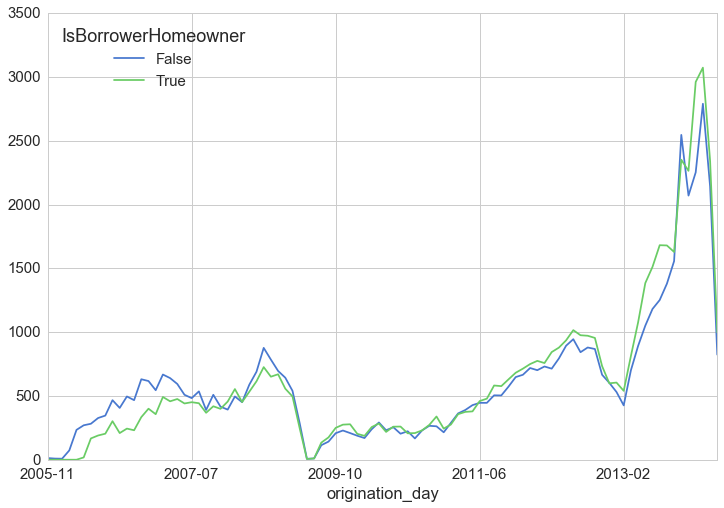

In [73]:
pd.crosstab(loan_df['origination_day'], loan_df['IsBorrowerHomeowner']).plot()


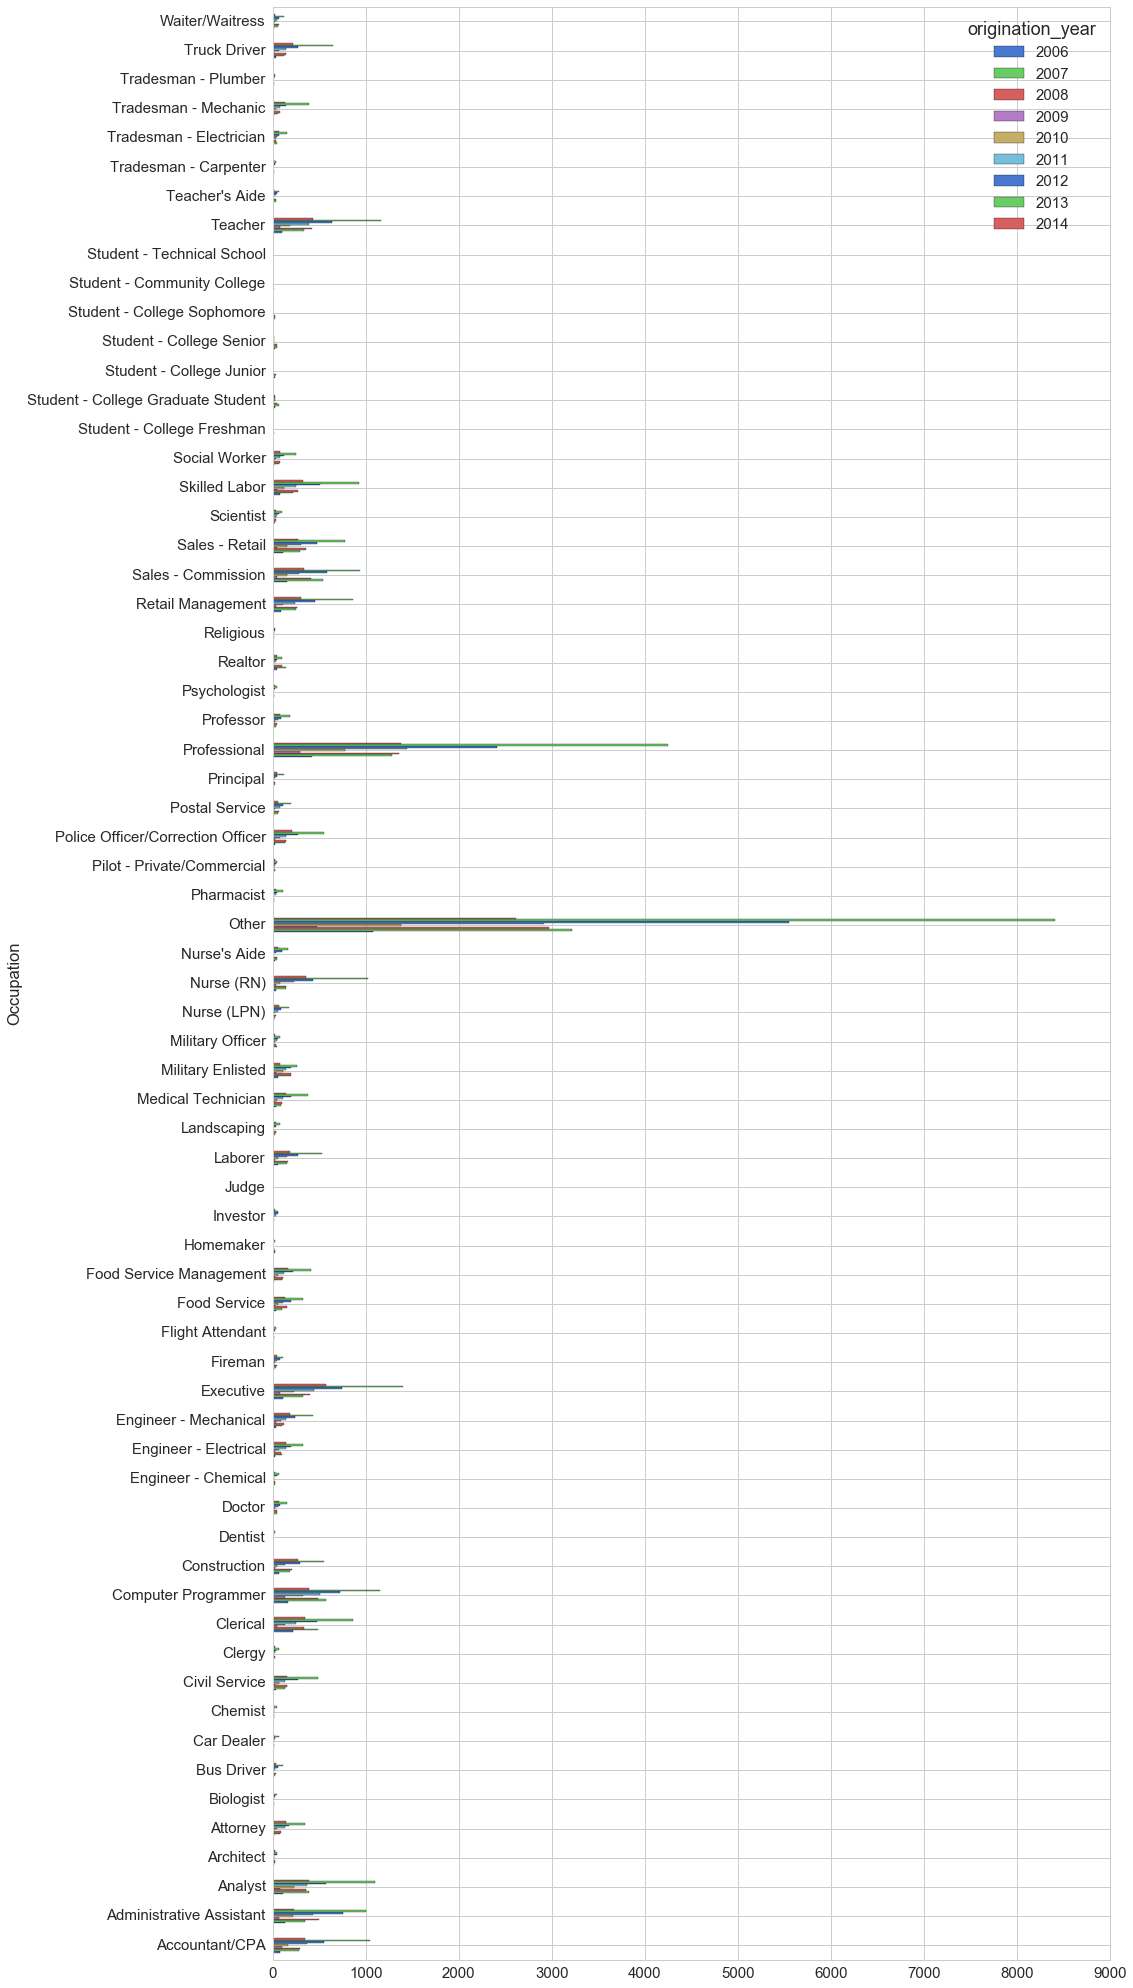

In [84]:
# loan_df['Occupation'].value_counts()
pd.crosstab(loan_df['origination_day'], loan_df['Occupation'])

loan_df['origination_year'] = loan_df['origination_day'].map(lambda x: x[0:4])
pd.crosstab( loan_df['Occupation'], loan_df['origination_year']).plot(kind='barh', figsize=(15,35))

In [74]:
loan_df.columns

Index([u'ListingNumber', u'ListingCreationDate', u'CreditGrade', u'Term',
       u'LoanStatus', u'ClosedDate', u'BorrowerAPR', u'BorrowerRate',
       u'LenderYield', u'EstimatedEffectiveYield', u'EstimatedLoss',
       u'EstimatedReturn', u'ProsperRating (numeric)',
       u'ProsperRating (Alpha)', u'ProsperScore', u'ListingCategory (numeric)',
       u'BorrowerState', u'Occupation', u'EmploymentStatus',
       u'EmploymentStatusDuration', u'IsBorrowerHomeowner',
       u'CurrentlyInGroup', u'GroupKey', u'DateCreditPulled',
       u'CreditScoreRangeLower', u'CreditScoreRangeUpper',
       u'FirstRecordedCreditLine', u'CurrentCreditLines', u'OpenCreditLines',
       u'TotalCreditLinespast7years', u'OpenRevolvingAccounts',
       u'OpenRevolvingMonthlyPayment', u'InquiriesLast6Months',
       u'TotalInquiries', u'CurrentDelinquencies', u'AmountDelinquent',
       u'DelinquenciesLast7Years', u'PublicRecordsLast10Years',
       u'PublicRecordsLast12Months', u'RevolvingCreditBalance',
    

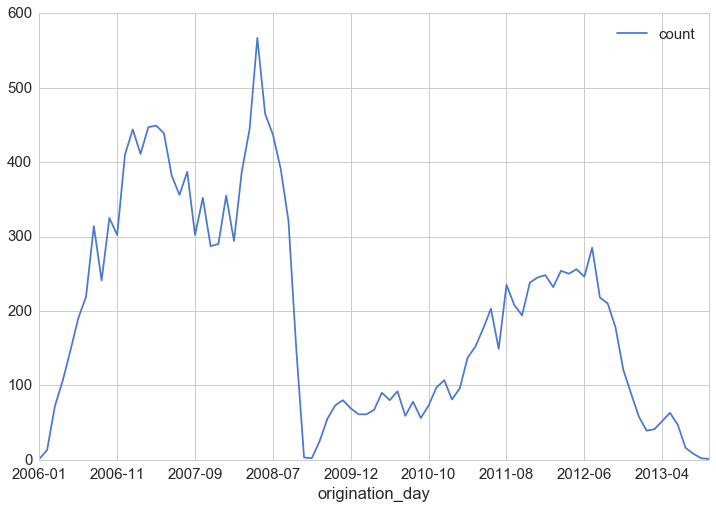

In [95]:
#['origination_day', 'closed_day', 'LoanFirstDefaultedCycleNumber']
loan_df[loan_df.LoanFirstDefaultedCycleNumber.notnull()].groupby('origination_day')['LoanFirstDefaultedCycleNumber'].agg(['count']).plot()

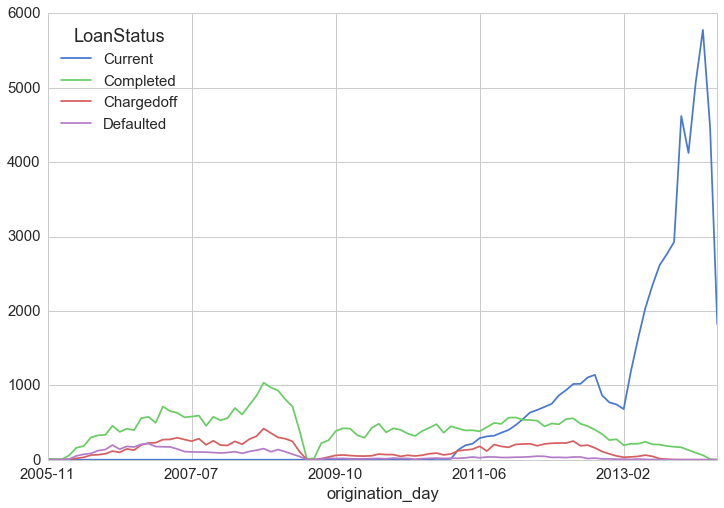

In [101]:
# loan_df['LoanStatus'].value_counts()
loan_df.LoanStatus.value_counts().index
pd.crosstab(loan_df['origination_day'], loan_df['LoanStatus'])[['Current', 'Completed', 'Chargedoff', 'Defaulted']].plot()

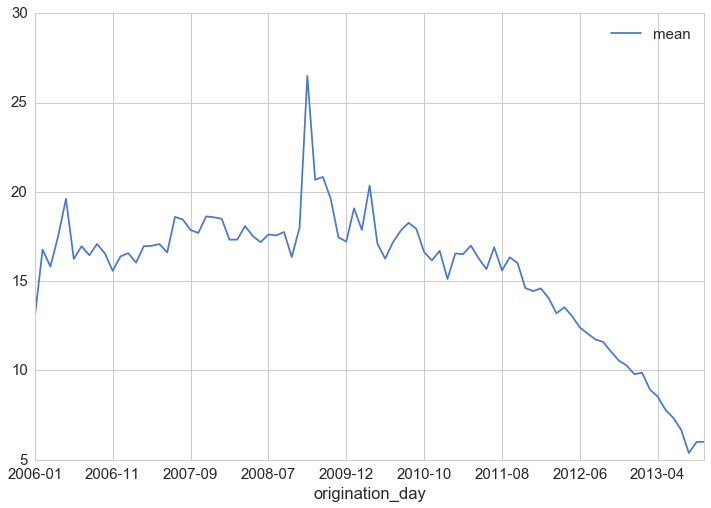

In [94]:
loan_df[loan_df.LoanFirstDefaultedCycleNumber.notnull()].groupby('origination_day')['LoanFirstDefaultedCycleNumber'].agg(['mean']).plot()